In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
matplotlib.get_backend()
matplotlib.matplotlib_fname()
matplotlib.style.use('ggplot')
from subprocess import check_output

In [16]:
fake_news = pd.read_csv("fake_or_real_news.csv",index_col="Unnamed: 0")
fake_news = fake_news.reset_index(drop=True)
fake_news.head(10)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [17]:
fake_news.groupby(['label'])['text'].count()

label
FAKE    3164
REAL    3171
Name: text, dtype: int64

In [18]:
fake_news['label'] = fake_news['label'].map({'FAKE': 0, 'REAL': 1})
fake_news.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


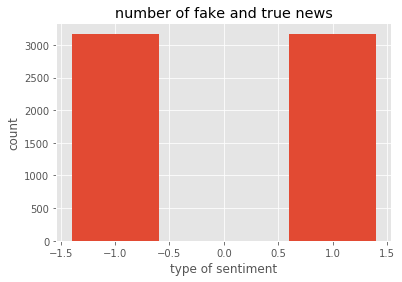

In [19]:
#creting a bar graph for number of emails in each class
from matplotlib import pyplot as plt
x=[-1,1]
y=[3164, 3171]

plt.bar(x,y)
plt.xlabel('type of sentiment')
plt.ylabel('count')
plt.title('number of fake and true news')
plt.legend()
plt.show()

In [20]:
#dataframe["period"] = dataframe["Year"].map(str) + dataframe["quarter"]
df = pd.DataFrame()
df["text"] = fake_news['title'].map(str)+ " " + fake_news['text']
df['label'] = fake_news['label']


df['text'] = df['text'].str.lower()
only_text = pd.DataFrame()
only_text = df['text']


In [21]:
#removing stopwords
import re
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
only_text = only_text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#data cleaning
#1. it is seen that there are hyperlinks present, so lets remove the hyperlinks
#also taking only those words which have length less than 15letters and greater than 2 into 'a'
#p=re.compile(r'\<http.+?\>', re.DOTALL)
a = []
b=[]
new_string = []
for i in only_text:
    #b =re.sub(p, '', i)    
    b = ' '.join([w for w in i.split() if len(w)<15])
    b = ' '.join([w for w in b.split() if len(w)>3])
    a.append(b)

#creating pandas dataframe and then converting it into panda series 
#removing all the characters except a-z cause we do not need numbers for sentiment analysis
#removing words am, pm, suriyah krishnan
only_text_pd = pd.DataFrame({'text':a})
only_text_se = only_text_pd['text']
only_text_se= only_text_se.str.replace('[^a-z \n]',"")
only_text_se = only_text_se.str.replace('fake|real', "")

only_text_se[23] #processed text

'senate majority leaders main goal gop dont scary mitch mcconnell unusual admonition republican majority takes senate week dont scary incoming senate majority leader political goal next years overseeing functioning reasonable majority capitol hill scores measured conservative wins particularly environmental regulations probably victories full repeal healthcare law mcconnells priority stage potential presidential victory  dont want american people think republican president republican congress thats going scary outcome want american people comfortable fact republican house senate responsible governing majority kentucky republican said broad interview christmas capitol office its defiant declaration  single important goal make president obama oneterm president antagonizing oath democrats frequently invoke embarrass leader obama reelection comfortably  mcconnells party lost seats charge ends capitol republicans avoid worst excesses past four years make sure public isnt fearful gops course

In [22]:
only_text[23]

'new senate majority leader’s main goal gop: don’t scary mitch mcconnell unusual admonition new republican majority takes senate week: don’t “scary.” incoming senate majority leader set political goal next two years overseeing functioning, reasonable majority capitol hill scores measured conservative wins, particularly environmental regulations, probably big victories full repeal health-care law. mcconnell’s priority set stage potential gop presidential victory 2016. “i don’t want american people think add republican president republican congress, that’s going scary outcome. want american people comfortable fact republican house senate responsible, right-of-center, governing majority,” kentucky republican said broad interview christmas capitol office. it’s far cry defiant declaration 2010 “single important” goal make president obama one-term president, antagonizing oath democrats frequently invoke embarrass gop leader — obama reelection comfortably 2012, mcconnell’s party lost seats. c

In [23]:
#creating series of pandas
X= only_text_se
y= df['label']

#splitting the data into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4751,)
(1584,)
(4751,)
(1584,)


C:\Users\mohanaditaya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
#initiating count vectorizer and removing stop words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vect = CountVectorizer(stop_words='english',max_df=.3)

In [25]:
#fitting train data and then transforming it to count matrix
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<4751x65285 sparse matrix of type '<class 'numpy.int64'>'
	with 1126936 stored elements in Compressed Sparse Row format>

In [26]:
#transforming the test data into the count matrix initiated for train data
#no fitting takes place
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1584x65285 sparse matrix of type '<class 'numpy.int64'>'
	with 369555 stored elements in Compressed Sparse Row format>

### Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

#fitting the model into train data 
nb.fit(X_train_dtm, y_train)

#predicting the model on train and test data
y_pred_class_test = nb.predict(X_test_dtm)
y_pred_class_train = nb.predict(X_train_dtm)

In [28]:
nb.predict(X_test_dtm)

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [29]:
X_test.iloc[1]

'announces troop deployment near russias borders military british defense secretary michael fallon photo afp british defense minister michael fallon says deploy hundreds troops baltic region europe support nato allies face more assertive russia fallon told nato ministerial meeting brussels wednesday britain would send soldiers estonia fulfill pledge deliver four battalions natos enhanced forward presence eastern europe backed rising defense budget deployment air land forces shows continue play leading role nato supporting defense security allies north south alliance fallon said nato announced july would deploy rotational basis four multinational battalions poland baltic latvia lithuaniato deter referred any russian incursion address meeting fallon also said four british typhoon fighter jets would dispatched romania nato southern policing mission supposed protect baltic states airspace possible attacks russia this things reassurance needs done formidable presence deterrence fallon said 

In [30]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class_test))
print(metrics.accuracy_score(y_train, y_pred_class_train))

0.8869949494949495
0.9444327509997895


In [34]:
# print the confusion matrix

from sklearn.metrics import confusion_matrix
m = metrics.confusion_matrix(y_test, y_pred_class_test)
#plot_confusion_matrix(cm,classes=['FAKE', 'REAL'])

In [35]:
cm

array([[681, 136],
       [ 43, 724]], dtype=int64)

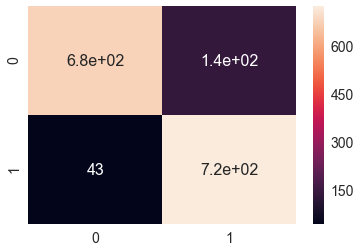

In [38]:
import seaborn as sns
import matplotlib
%matplotlib inline
cm = metrics.confusion_matrix(y_test, y_pred_class_test)
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm,annot=True,annot_kws={"size": 16})# font size

In [53]:
#number of records in each class in test data
y_test.value_counts()

0    817
1    767
Name: label, dtype: int64

In [54]:
# store the vocabulary of X_train
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

65285

In [55]:
# examine the first 50 tokens
print(X_train_tokens[0:50])

['aa', 'aaaa', 'aaas', 'aab', 'aachen', 'aadhar', 'aadmi', 'aae', 'aaiball', 'aakar', 'aakhri', 'aalia', 'aaliya', 'aaliyas', 'aall', 'aamaq', 'aamon', 'aap', 'aapke', 'aapko', 'aapne', 'aarhus', 'aaron', 'aarons', 'aaronson', 'aaronsons', 'aarp', 'aart', 'aas', 'aaso', 'aata', 'aauw', 'aauws', 'aaye', 'aayush', 'ab', 'abaaoud', 'abaaouds', 'ababa', 'aback', 'abad', 'abadi', 'abadis', 'abaldo', 'aban', 'abandon', 'abandoned', 'abandonedover', 'abandoning', 'abandonment']


In [56]:
# examine the last 50 tokens
print(X_train_tokens[-50:])

['zombies', 'zombified', 'zonal', 'zondervan', 'zone', 'zonelike', 'zones', 'zoning', 'zoo', 'zook', 'zoologist', 'zoom', 'zoomed', 'zooming', 'zoomph', 'zooms', 'zora', 'zoroaster', 'zoroastrian', 'zouzou', 'zova', 'ztech', 'zucchini', 'zuccotti', 'zuck', 'zucker', 'zuckerberg', 'zuckerbergs', 'zuckerburg', 'zuckerburgs', 'zucman', 'zuesse', 'zulema', 'zulia', 'zulu', 'zulus', 'zuma', 'zuniga', 'zurich', 'zurichs', 'zurita', 'zuroff', 'zuylenwood', 'zvai', 'zvezda', 'zvulun', 'zwanzig', 'zweiter', 'zwick', 'zyuganov']


In [57]:
# Naive Bayes counts the number of times each token appears in each class
nb.feature_count_

array([[3., 1., 1., ..., 1., 0., 2.],
       [0., 0., 0., ..., 0., 3., 0.]])

In [58]:
# rows represent classes, columns represent tokens
nb.feature_count_.shape

(2, 65285)

In [59]:
# number of times each token appears across all fake articles
fake_token_count = nb.feature_count_[0, :]
fake_token_count

array([3., 1., 1., ..., 1., 0., 2.])

In [60]:
# number of times each token appears across all real articles
real_token_count = nb.feature_count_[1, :]
real_token_count

array([0., 0., 0., ..., 0., 3., 0.])

In [61]:
# create a DataFrame of tokens with their separate real and fake counts
tokens = pd.DataFrame({'token':X_train_tokens, 'real':real_token_count, 'fake':fake_token_count}).set_index('token')

In [62]:
freq_real = tokens.sort_values(by='real', ascending = False)
freq_real = freq_real.drop('fake',1)
freq_real.head()

,real
token,
obama,3558.0
party,2756.0
house,2736.0
sanders,2648.0
percent,2611.0


In [63]:
freq_fake = tokens.sort_values(by='fake', ascending = False)
freq_fake = freq_fake.drop('real',1)
freq_fake = freq_fake.drop(freq_fake.index[[3]])
freq_fake.head()



,fake
token,
world,2234.0
government,1984.0
obama,1526.0
russia,1432.0
united,1353.0


In [64]:
new_text = pd.Series('during election time the world was expecting clinton party taking up the government but after the election results were out it is found that trump got the presidency and it is claimed that trump was aided by russian and media higher authorities to change the opinion of people')
new_test_dtm = vect.transform(new_text)
nb.predict(new_test_dtm)

array([0], dtype=int64)

In [65]:
new_data = pd.Series ('although obama has ruled very well and the party did pretty decent job in helping nation recover from economic crisis, the party campaign led by clinton was not that effective and the debate with sanders has shown the view of clintons thinking towards americas progress')
new_data_dtm = vect.transform(new_data)
nb.predict(new_data_dtm)

array([1], dtype=int64)

In [66]:
# Naive Bayes counts the number of observations in each class
nb.class_count_

array([2347., 2404.])

In [67]:
#Before we can calculate the "spamminess" of each token, we need to avoid dividing by zero and account for the class imbalance
# add 1 to real and fake counts to avoid dividing by 0
tokens['real'] = tokens.real + 1
tokens['fake'] = tokens.fake + 1
tokens.sample(5, random_state=6)

,fake,real
token,,
anytime,7.0,31.0
magnification,2.0,1.0
honored,15.0,30.0
misguidedly,1.0,2.0
repent,3.0,2.0


In [68]:
# convert the real  and fake counts into frequencies
tokens['real'] = tokens.real / nb.class_count_[0]
tokens['fake'] = tokens.fake / nb.class_count_[1]
tokens.sample(5, random_state=6)

,fake,real
token,,
anytime,0.002912,0.013208
magnification,0.000832,0.000426
honored,0.006240,0.012782
misguidedly,0.000416,0.000852
repent,0.001248,0.000852


In [69]:
# calculate the ratio of fake to real for each token
tokens['fake_ratio'] = tokens.fake / tokens.real
tokens.sample(5, random_state=6)

,fake,real,fake_ratio
token,,,
anytime,0.002912,0.013208,0.220452
magnification,0.000832,0.000426,1.952579
honored,0.006240,0.012782,0.488145
misguidedly,0.000416,0.000852,0.488145
repent,0.001248,0.000852,1.464434


In [70]:
# calculate the ratio of fake to real for each token
tokens['real_ratio'] = tokens.real / tokens.fake
tokens.sample(5, random_state=6)

,fake,real,fake_ratio,real_ratio
token,,,,
anytime,0.002912,0.013208,0.220452,4.536125
magnification,0.000832,0.000426,1.952579,0.512143
honored,0.006240,0.012782,0.488145,2.048573
misguidedly,0.000416,0.000852,0.488145,2.048573
repent,0.001248,0.000852,1.464434,0.682858


In [71]:
# examine the DataFrame sorted by fake_ratio
tokens_real = tokens.sort_values('real_ratio', ascending=False).head(5)

In [72]:
tokens_real

,fake,real,fake_ratio,real_ratio
token,,,,
fiorina,0.000832,0.140179,0.005935,168.495100
frontrunner,0.001248,0.149979,0.008321,120.182929
boehner,0.001664,0.197273,0.008434,118.561142
caucuses,0.001248,0.127397,0.009796,102.087204
lewandowski,0.000416,0.040051,0.010386,96.282914


## Logistic Regression

In [73]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
seed=12
logreg = LogisticRegression(C=2, random_state=12, class_weight='balanced')

In [74]:
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=2, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=12,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [75]:
y_log_pred_test = logreg.predict(X_test_dtm)
y_log_pred_train = logreg.predict(X_train_dtm)

In [76]:
metrics.accuracy_score(y_test, y_log_pred_test)


0.9065656565656566

In [77]:
metrics.accuracy_score(y_train, y_log_pred_train)

1.0

In [78]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_log_pred_test)

array([[743,  74],
       [ 74, 693]], dtype=int64)

## Random Forest

In [79]:
#initializing reandom forest
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=25)
RF_clf.fit(X_train_dtm, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
#predicting on train and test data
RF_clf.fit(X_train_dtm, y_train)
y_rf_pred_test = RF_clf.predict(X_test_dtm)
y_rf_pred_train = RF_clf.predict(X_train_dtm)
probs_rf = RF_clf.predict_proba(X_test_dtm)

In [81]:
probs_rf = RF_clf.predict_proba(X_test_dtm) #predict probabilities
probs_rf

array([[0.24, 0.76],
       [0.6 , 0.4 ],
       [0.84, 0.16],
       ...,
       [0.2 , 0.8 ],
       [0.32, 0.68],
       [0.32, 0.68]])

In [82]:
probs = probs_rf[:,1]  #taking a column

In [83]:
probs[probs > 0.5] =1  #setting thresholds
probs[probs <= 0.5] = 0
probs

array([1., 0., 0., ..., 1., 1., 1.])

In [84]:
metrics.accuracy_score(y_test, probs)  #accuracy on the predicted probabilities

0.8693181818181818

In [85]:
#good accuracy on test data
metrics.accuracy_score(y_test, y_rf_pred_test)  #accuracy on predicted test data

0.8693181818181818

## As I took the threshold as 0.5 the result is same one can change threshold and get different accuracy

In [86]:
#good accuracy on test data
metrics.accuracy_score(y_test, y_rf_pred_test)


0.8693181818181818

In [87]:
#overfitting on train dataa
metrics.accuracy_score(y_train, y_rf_pred_train)


1.0

In [121]:
#for separating each category
X= only_text_se
y= df['label']


Xy = pd.concat([X,y], axis=1)

fake = Xy[Xy['text'].notnull() & (Xy['label'] == 0)]

real = Xy[Xy['text'].notnull() & (Xy['label'] == 1)]


print(fake.shape)
print(real.shape)


Xy.groupby(['label'])['text'].count()

(3164, 2)
(3171, 2)


label
0    3164
1    3171
Name: text, dtype: int64

In [124]:
#exporting to form word cloud
fake = fake[['text']]
real = real[['text']]

fake.to_csv('fake.txt', header=None, index=None, sep=' ', mode='a')
real.to_csv('real.txt', header=None, index=None, sep=' ', mode='a')


#importing the text format
with open('fake.txt', 'r') as input_file:
    fake = input_file.read()
    
with open('real.txt', 'r') as input_file:
    real = input_file.read()
    



In [ ]:
#fake word cloud
import wordcloud
wc = wordcloud.WordCloud()
fake = re.sub('fake', '',fake)

#jj = WordCloud(background_color="white",width=800, height=400).generate_from_text(fake)
img = wc.generate_from_text(fake)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img)
plt.show()

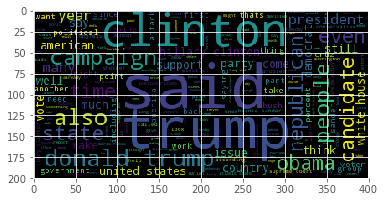

In [263]:
#real word cloud
wc = wordcloud.WordCloud()
real = re.sub('real', '',real)
img = wc.generate_from_text(real)
plt.imshow(img)
plt.show()

In [ ]:
from nltk import word_tokenize
all_text = fake.text.str.cat(fake.text, sep=' ')
words = nltk.word_tokenize(" ".join(all_text.tolist()))

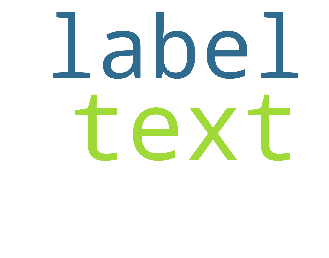

In [119]:
from wordcloud import WordCloud, STOPWORDS

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(fake))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()